In [1]:
import pandas as pd
import numpy as np
from numpy import NaN,NAN,nan

#데이터 출처:ECOS 한국은행 경제통계시스템
#원/달러 환율은 서울외국환시장 은행간거래의 종가(오후 3시 30분 마감)

df_exchange=pd.read_csv("환율데이터.csv")
df_exchange.head() #1행 206열의 넓은 데이터이므로 melt 필요

,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,...,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24
0,NaN,NaN,"1,187.80","1,196.00","1,189.40","1,188.50","1,181.40",NaN,NaN,"1,187.20",...,NaN,NaN,NaN,"1,185.80","1,185.10","1,182.30","1,186.30",NaN,NaN,"1,185.30"


In [2]:
#데이터 melt
#기준이 될 열이 존재하지 않으므로 분석 대상이 아닌 2020-02-01을 기준으로 melt시킨 뒤 삭제
df_exchange=df_exchange.melt(id_vars='2020-02-01',var_name="날짜")
del df_exchange["2020-02-01"] 
df_exchange

,날짜,value
0,2020-02-02,NaN
1,2020-02-03,"1,187.80"
2,2020-02-04,"1,196.00"
3,2020-02-05,"1,189.40"
4,2020-02-06,"1,188.50"
...,...,...
200,2020-08-20,"1,182.30"
201,2020-08-21,"1,186.30"
202,2020-08-22,NaN
203,2020-08-23,NaN


In [3]:
#변수명 변경
df_exchange=df_exchange.rename(columns={"날짜":"date","value":"rate"})
#df_exchange.info()

In [4]:
#천단위 구분 기호 제거(실수형으로 바꾸기 위해)
#천단위 구분 기호 때문에 실수형으로 변경이 되지 않음.
a = df_exchange["rate"].str.replace(",","")
df_exchange["rate"]=a
df_exchange

,date,rate
0,2020-02-02,NaN
1,2020-02-03,1187.80
2,2020-02-04,1196.00
3,2020-02-05,1189.40
4,2020-02-06,1188.50
...,...,...
200,2020-08-20,1182.30
201,2020-08-21,1186.30
202,2020-08-22,NaN
203,2020-08-23,NaN


In [5]:
#float으로 변환
df_exchange["rate"]=df_exchange["rate"].astype("float") 
df_exchange.info()

#datetime으로 변환
df_exchange["date"]=df_exchange["date"].astype("datetime64") 
df_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    205 non-null    object 
 1   rate    141 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    205 non-null    datetime64[ns]
 1   rate    141 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [6]:
#rate열에 64개의 결측치 존재(주말 및 공휴일)
np.count_nonzero(df_exchange.isnull()) 

#결측치 제거
df_exchange.dropna(inplace=True) #205-64=141개 행만 남음.
df_exchange    

#csv파일로 저장
df_exchange.to_csv('exchange_rate_dropna.csv', index=False)

In [7]:
#2월 7일부터 시작하도록 데이터프레임 저장
#인덱스를 0부터 다시 부여
df_exchange=df_exchange.loc[5:,]
df_exchange.reset_index(drop=True) #137개 행

,date,rate
0,2020-02-07,1181.4
1,2020-02-10,1187.2
2,2020-02-11,1189.8
3,2020-02-12,1184.1
4,2020-02-13,1179.8
...,...,...
132,2020-08-18,1185.8
133,2020-08-19,1185.1
134,2020-08-20,1182.3
135,2020-08-21,1186.3


In [8]:
#코로나 데이터에서 금요일,토요일만 삭제!

df_covid=pd.read_csv("wuhan_daily_diff.csv")
#df_covid.head()
#df_covid.info() #date가 문자형-->날짜형으로 변환 필요
#df_covid.shape #200행,2열

b=df_covid["Date"].astype("datetime64") #날짜형으로 변환
df_covid["Date"]=b

df_covid.info()

import time
import calendar

#년,월,일 추출하여 새로운 열 생성
df_covid["year"]=df_covid["Date"].dt.year
df_covid["month"]=df_covid["Date"].dt.month
df_covid["day"]=df_covid["Date"].dt.day

from datetime import datetime

a=set(df_covid_weekday["Date"]) #공휴일이 지워지지 않음.
b=set(df_exchange["date"]) 
len(a) #142개
len(b) #137개
142-137=5개 행 더 제거 필요!


#a와 b의 차집합 확인
diff=a.difference(b)
diff

#5개 출력
#2020-04-15 #총선
#2020-04-30 #부처님오신날
#2020-05-01 #근로자의날
#2020-05-05 #어린이날
#2020-08-17 #대체공휴일


#요일을 반환하는 함수 생성

def f(x):    
    return calendar.weekday(x.year,x.month,x.day)

df_covid["dayofweek"]=df_covid.Date.apply(f)
df_covid.head()

#dayofweek가 4,5인 데이터 삭제(금,토)
df_covid_nonsaturday=df_covid[(df_covid["dayofweek"]!=4)&(df_covid["dayofweek"]!=5)]
df_covid_nonsaturday.shape #142행 6열
df_covid_nonsaturday.dayofweek.nunique() #5개(0,1,2,3,,6)--->4,5가 사라진 것을 알 수 있음



#holiday에 포함안되는 행은 True,포함되면 False
holiday=["2020-04-15","2020-04-30","2020-05-01","2020-05-05","2020-08-17"]


#holiday여부 판단하는 함수 생성

def f(x):
    x = datetime.strftime(x, '%Y-%m-%d')
    if x in holiday:
        return False
    else:
        return True
    
df_covid_nonsaturday = df_covid_nonsaturday[df_covid_nonsaturday.Date.apply(f)]
df_covid_nonsaturday #4개 빠짐(공휴일 중에 하루가 금요일이라 4개만 빠짐.)

#df_covid_nonsaturday.isnull()
#df_covid_nonsaturday.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       200 non-null    datetime64[ns]
 1   Confirmed  200 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 KB


,Date,Confirmed,year,month,day,dayofweek
2,2020-02-09,0,2020,2,9,6
3,2020-02-10,1,2020,2,10,0
4,2020-02-11,0,2020,2,11,1
5,2020-02-12,0,2020,2,12,2
6,2020-02-13,0,2020,2,13,3
...,...,...,...,...,...,...
193,2020-08-18,297,2020,8,18,1
194,2020-08-19,288,2020,8,19,2
195,2020-08-20,324,2020,8,20,3
198,2020-08-23,266,2020,8,23,6


In [9]:
#전처리가 된 두개의 데이터를 full outer join!
#필요한 열로만 구성된 dataframe 생성.

p=pd.merge(df_exchange,df_covid_nonsaturday,left_on="date",right_on="Date",how="outer")
p2=p[["date","rate","Date","Confirmed"]]
p2

#p2.sort_values(by="Date").head(20)

,date,rate,Date,Confirmed
0,2020-02-07,1181.4,NaT,NaN
1,2020-02-10,1187.2,2020-02-10,1.0
2,2020-02-11,1189.8,2020-02-11,0.0
3,2020-02-12,1184.1,2020-02-12,0.0
4,2020-02-13,1179.8,2020-02-13,0.0
...,...,...,...,...
161,NaT,NaN,2020-07-26,25.0
162,NaT,NaN,2020-08-02,23.0
163,NaT,NaN,2020-08-09,28.0
164,NaT,NaN,2020-08-16,197.0


In [10]:
for row in range(p2.shape[0]):
    if pd.isnull(p2.iloc[row, 0]):
        p2.iloc[row,0 ] = p2.iloc[row,2 ]
    elif pd.isnull(p2.iloc[row, 2]):
        p2.iloc[row,2 ] = p2.iloc[row,0 ]   
        
p2.sort_values(by="Date",inplace=True)
p2
#p2.shape #166행 4열
#p2.head(20)

C:\Users\student\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-10-e2bb1076b58a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2.sort_values(by="Date",inplace=True)


,date,rate,Date,Confirmed
0,2020-02-07,1181.4,2020-02-07,NaN
137,2020-02-09,NaN,2020-02-09,0.0
1,2020-02-10,1187.2,2020-02-10,1.0
2,2020-02-11,1189.8,2020-02-11,0.0
3,2020-02-12,1184.1,2020-02-12,0.0
...,...,...,...,...
133,2020-08-19,1185.1,2020-08-19,288.0
134,2020-08-20,1182.3,2020-08-20,324.0
135,2020-08-21,1186.3,2020-08-21,NaN
165,2020-08-23,NaN,2020-08-23,266.0


In [11]:
sum(p2["Date"].isnull())
sum(p2["date"].isnull())

0

In [26]:
p3=p2.iloc[1:,]
p3 #2월 9일부터의 데이터프레임
p3["rate"]
len(p3["rate"]) #165개
p3["Confirmed"]
len(p3["Confirmed"]) #165개

165

In [27]:
rate_list=list(p3["rate"])
confirmed_list=list(p3["Confirmed"])

In [28]:
rate_list
len(rate_list) #165개

165

In [32]:
confirmed_list
len(confirmed_list) #165개

165

In [33]:
#rate_list.remove(nan)
from numpy import NaN,NAN,nan

rate_new_list=[ i for i in rate_list if pd.isnull(i)==False]
confirmed_new_list=[ i for i in confirmed_list if pd.isnull(i)==False]

In [42]:
len(rate_new_list) #136개   
len(confirmed_new_list) #136개
#confirmed_new_list.remove(280.0)
#del(confirmed_new_list[57])

136

In [19]:
from matplotlib import font_manager
import matplotlib.pyplot as plt

font_path = "c:/windows/fonts/H2GTRE.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)

In [43]:
rate_new_list        
len(confirmed_new_list)

136

In [44]:
new_df=pd.DataFrame({"Confirmed":confirmed_new_list, "rate":rate_new_list})
new_df

,Confirmed,rate
0,0.0,1187.2
1,1.0,1189.8
2,0.0,1184.1
3,0.0,1179.8
4,0.0,1181.5
...,...,...
131,197.0,1185.8
132,297.0,1185.1
133,288.0,1182.3
134,324.0,1186.3


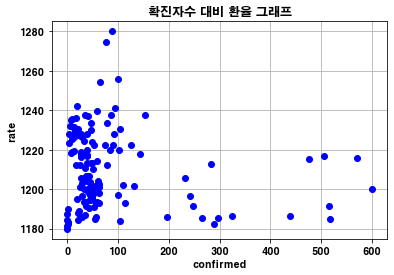

In [45]:
plt.plot(confirmed_new_list, rate_new_list, 'bo', )
plt.grid()
plt.xlabel("confirmed")
plt.ylabel("rate")
#plt.xlim(0,100)
plt.title("확진자수 대비 환율 그래프")
plt.show()

In [46]:
new_df.corr() #상관계수가 -0.165로 거의 상관이 없음

,Confirmed,rate
Confirmed,1.000000,-0.164648
rate,-0.164648,1.000000


In [47]:
from scipy import stats
des=stats.linregress(new_df.Confirmed,new_df.rate)
des[0] #기울기
des[1] #절편
des[2] #상관계수


-0.1646476559635567

In [48]:
slope,intercept,rvalue,pvalue,stderr=stats.linregress(new_df.Confirmed,new_df.rate)
print("8/24일 확진자수가 280명일 때 환율의 예측 값: ", 280*slope+intercept) #실제환율:1,185.10

8/24일 확진자수가 280명일 때 환율의 예측 값:  1205.181813690828


In [49]:
import statsmodels.formula.api as smf
import matplotlib.pylab as plt

#ols:ordinary least squares.
#결정계수:0.027
#회귀식의 계수:-0.0268
#유의수준:0.056 : 0.05보다 높으므로 변수로 사용하기에 적합하지 않다.
model=smf.ols(formula="rate~Confirmed",data=new_df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.734
Date:                Thu, 27 Aug 2020   Prob (F-statistic):             0.0554
Time:                        11:35:17   Log-Likelihood:                -595.05
No. Observations:                 136   AIC:                             1194.
Df Residuals:                     134   BIC:                             1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1212.6909      2.025    598.847      0.000    1208.686    1216.696
Confirmed     -0.0268      0.014     -1.932      0.055      -0.054       0.001
==============================================================================
Omnibus:                       11.921   Durbin-Watson:                   0.173
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.428
Skew:                           0.667   Prob(JB):                      0.00200
Kurtosis:                       3.643   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-62-c6f11181f1f2>:8: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  ry=polyval([slope,intercept],x)


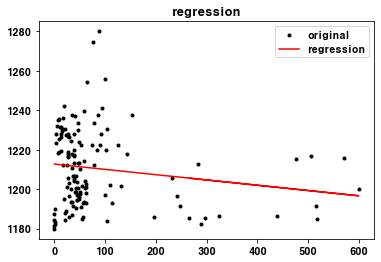

In [62]:
from scipy import stats,polyval
from pylab import plot,title,show,legend

x=new_df["Confirmed"]
y=new_df["rate"]

slope,intercept,r,p,std=stats.linregress(x,y)
ry=polyval([slope,intercept],x)

#print(slope,intercept,r,p,std)
#print(ry)
plot(x,y,'k.')
plot(x,ry,'r-')
title("regression")

legend(["original","regression"])
show()

# 시계열분석

In [108]:
p3.head(20)
p3_new=p3[["Date","rate"]]
p3_new=p3_new.fillna(method="bfill")
p3_new.info()
p3_new

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 137 to 136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    165 non-null    datetime64[ns]
 1   rate    165 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


,Date,rate
137,2020-02-09,1187.2
1,2020-02-10,1187.2
2,2020-02-11,1189.8
3,2020-02-12,1184.1
4,2020-02-13,1179.8
...,...,...
133,2020-08-19,1185.1
134,2020-08-20,1182.3
135,2020-08-21,1186.3
165,2020-08-23,1185.3


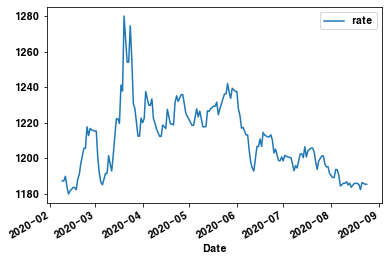

In [109]:
p3_new.index=p3_new["Date"]
p3_new.set_index("Date",inplace=True) #한번 돌렸으면 고정
#p3_new.head(20)

p3_new.plot()
plt.show()

In [110]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
#AR : 경향성, 현재는 과거의 상태로 추론된다.
#MA : 이전항에서의 차이(오차)를 참고한다. 
# (AR=2, I:차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(p3_new.rate.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  164
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -555.544
Method:                       css-mle   S.D. of innovations              7.158
Date:                Thu, 27 Aug 2020   AIC                           1123.087
Time:                        15:29:18   BIC                           1141.686
Sample:                             1   HQIC                          1130.638
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.596     -0.020      0.984      -1.180       1.156
ar.L1.D.y      0.6148      0.297      2.068      0.039       0.032       1.198
ar.L2.D.y     -0.3676      0.366     -1.005      0.3

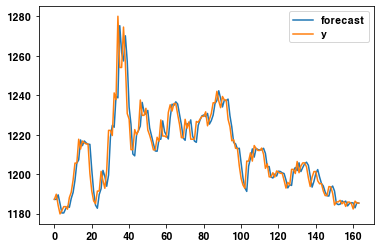

C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


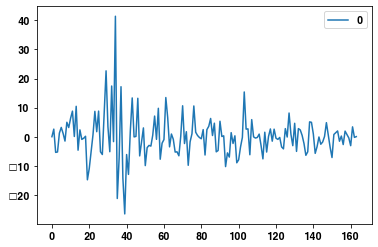

In [111]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화합니다. (두번째 그래프)
residuals.plot()

In [113]:
fig = model_fit.forecast(steps = 5)
print(fig)
print(fig[0])  #예측값 #1185.5038147

(array([1185.5038147 , 1185.64305685, 1185.64485847, 1185.58590226,
       1185.54011544]), array([ 7.15766788,  9.45801483, 11.72209091, 14.04676335, 16.1492512 ]), array([[1171.47504344, 1199.53258596],
       [1167.10568842, 1204.18042527],
       [1162.66998247, 1208.61973448],
       [1158.05475199, 1213.11705253],
       [1153.88816472, 1217.19206617]]))
[1185.5038147  1185.64305685 1185.64485847 1185.58590226 1185.54011544]


C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


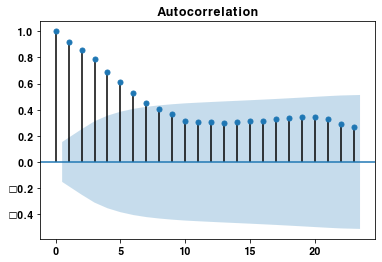

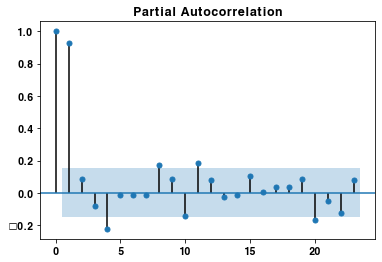

<Figure size 1440x288 with 0 Axes>

In [79]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(p3_new)
plot_pacf(p3_new)
plt.figure(figsize=(20,4))
plt.show()

# 다른코드

C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


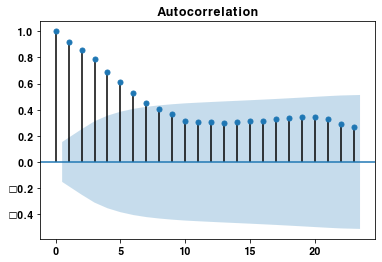

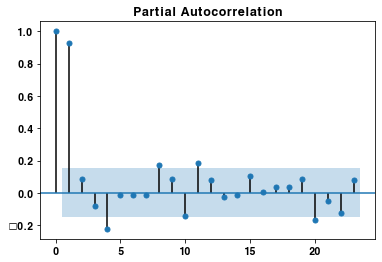

In [95]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(p3_new) #ACG가 빠르게 감소 PACF는 어느 시점에서 절단점을 갖는다.
plot_pacf(p3_new) #1에서 급격히 하강하므로 p=0,q=1이 적당하다.
plt.show()

C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


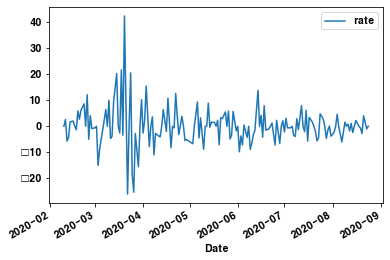

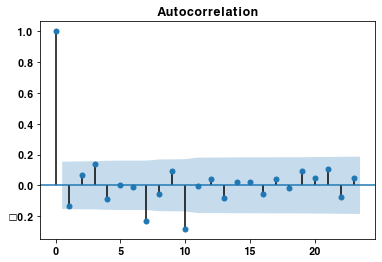

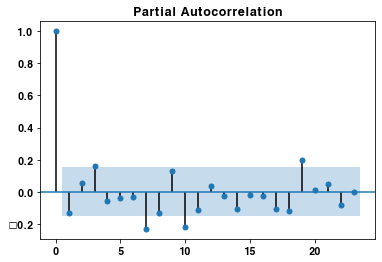

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=p3_new.diff(periods=1).iloc[1:]
diff_1.plot()


#시계열이 정상상태를 보이므로 1차차분으로만으로 충분! 
#ARIMA(0,1,1)
plot_acf(diff_1)
plot_pacf(diff_1) 
plt.show()



In [105]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(diff_1, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                  163
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -558.375
Method:                       css-mle   S.D. of innovations              7.323
Date:                Thu, 27 Aug 2020   AIC                           1122.750
Time:                        15:27:56   BIC                           1132.031
Sample:                             1   HQIC                          1126.518
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0108      0.012     -0.898      0.369      -0.035       0.013
ma.L1.D.rate    -1.0000      0.016    -62.183      0.000      -1.032      -0.968
                                    Roots   

C:\Users\student\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\student\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [107]:
fig = model_fit.forecast(steps = 1)
print(fig)
print(fig[0])  #예측값 #1185.5038147

(array([-0.91145378]), array([7.32308393]), array([[-15.26443454,  13.44152698]]))
[-0.91145378]
